In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# load datad
df = pd.read_csv('CarPrice_Assignment.csv')
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [2]:
# check for missing values
df.isnull().sum() # df.isna().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [3]:
# check for duplicates
df.duplicated().sum()

0

## Exploratory Data Analysis (EDA) of the dataset

In [4]:
## summary statistics
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [5]:
# summary statistics for categorical variables
df.describe(include='object')

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
count,205,205,205,205,205,205,205,205,205,205
unique,147,2,2,2,5,3,2,7,7,8
top,toyota corona,gas,std,four,sedan,fwd,front,ohc,four,mpfi
freq,6,185,168,115,96,120,202,148,159,94


### Create data visualizations

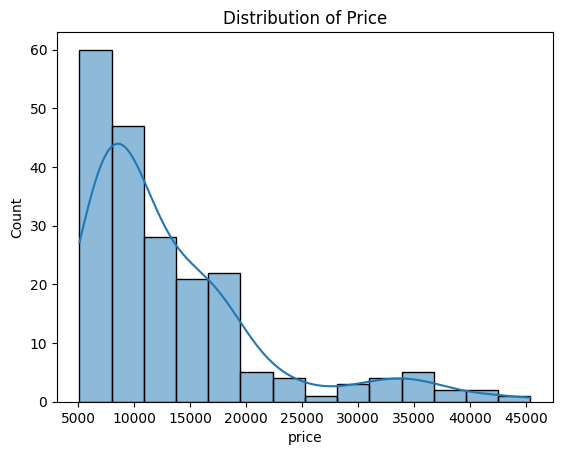

In [8]:
## ploting the distribution of numeric column

sns.histplot(df['price'], kde=True)
plt.title('Distribution of Price')
plt.show();

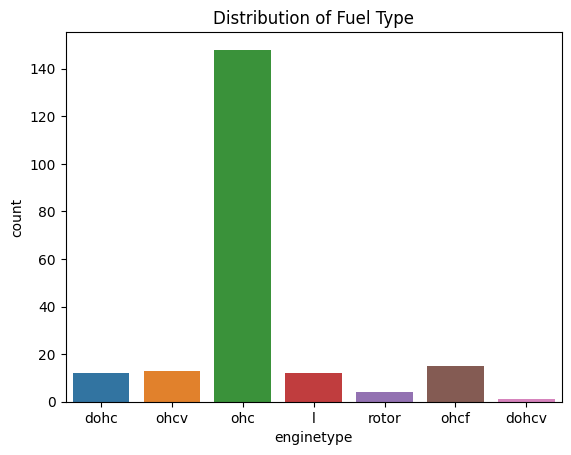

In [10]:
## ploting the distribution of categorical column

sns.countplot(data=df, x='enginetype')
plt.title('Distribution of Fuel Type')
plt.show();

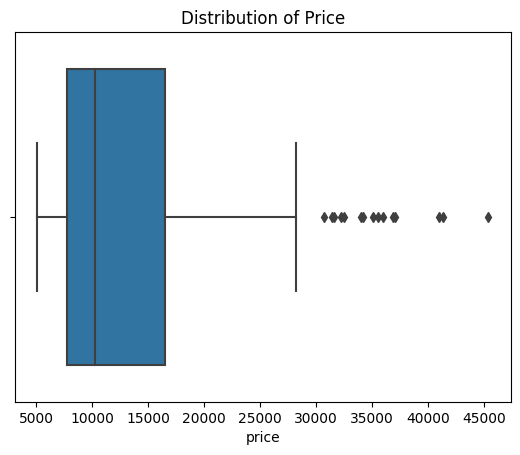

In [11]:
## check for ourliers

sns.boxplot(data=df, x='price')
plt.title('Distribution of Price')
plt.show();

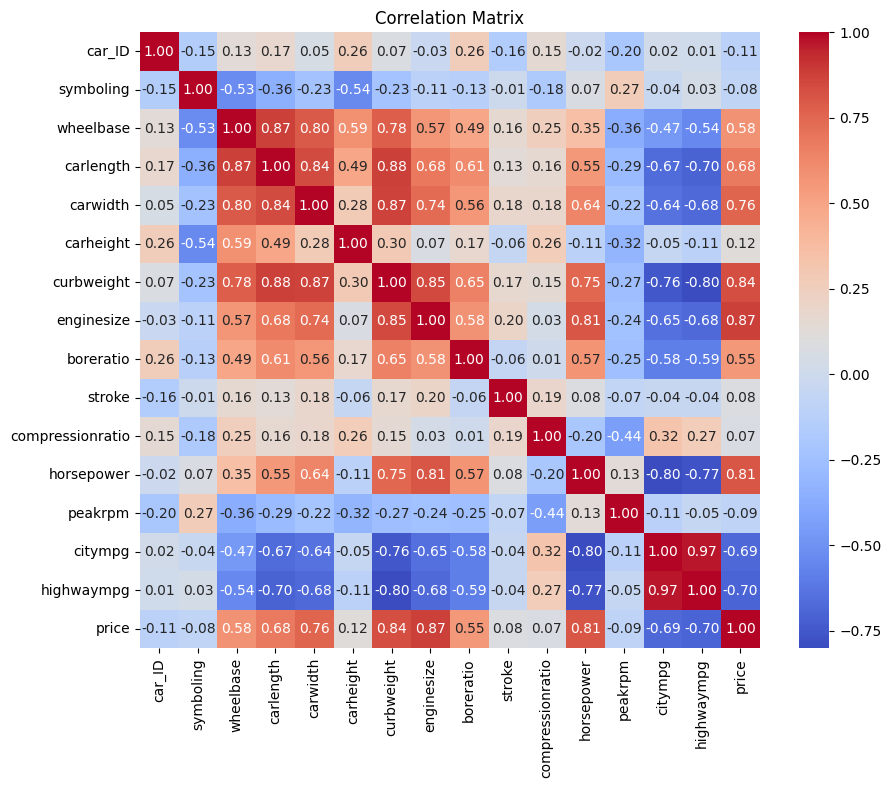

In [13]:
## check the relationship between two numeric variables

num_df = df.select_dtypes(include=['int64', 'float64'])
corr_df = num_df.corr()

# create a heatmap with the numeric correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_df, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show();

<Figure size 1000x800 with 0 Axes>

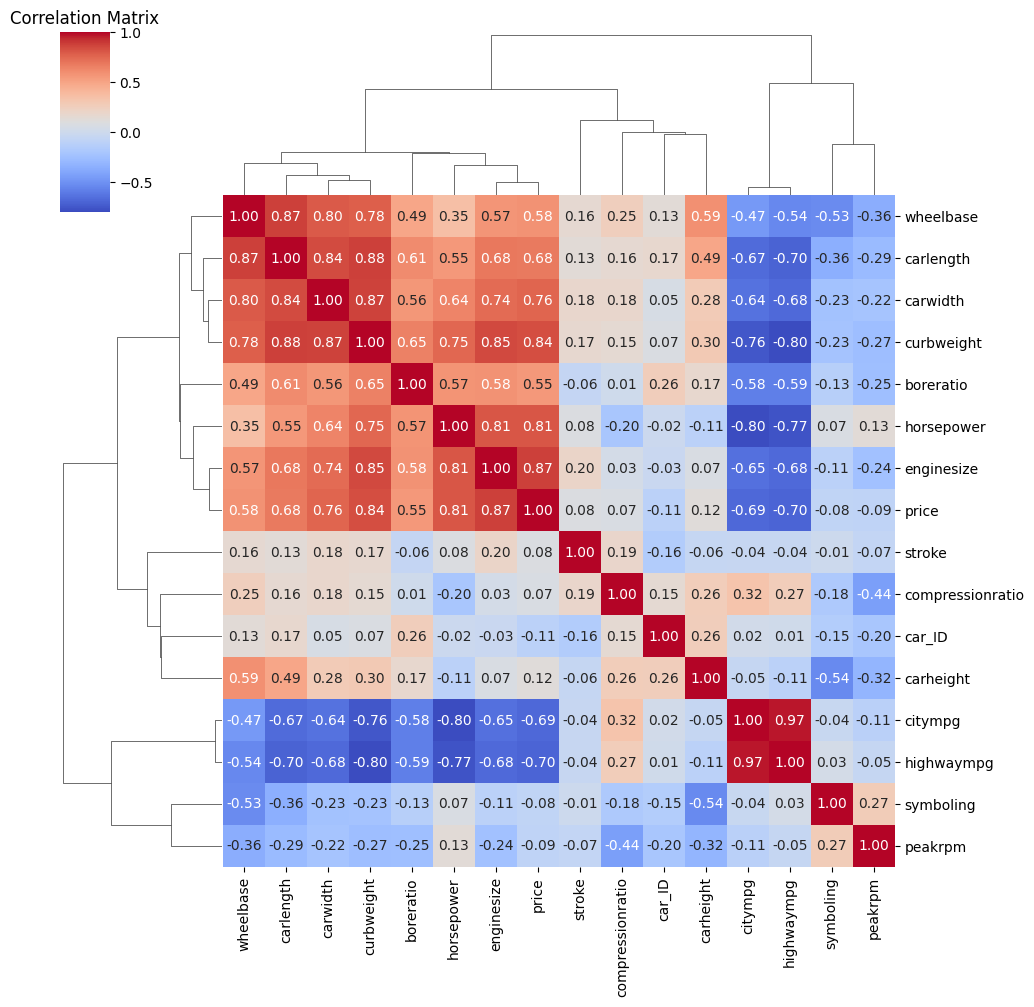

In [14]:
# create a heatmap with the numeric correlation matrix
plt.figure(figsize=(10, 8))
sns.clustermap(corr_df, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show();

## Modeling

In [15]:
# import data here
df = pd.read_csv('CarPrice_Assignment.csv')

# pick only the numeric columns
num_df = df.select_dtypes(include=['int64', 'float64'])
num_df.head()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0


Problem statement: Predict the price of a car based on the features of the car.

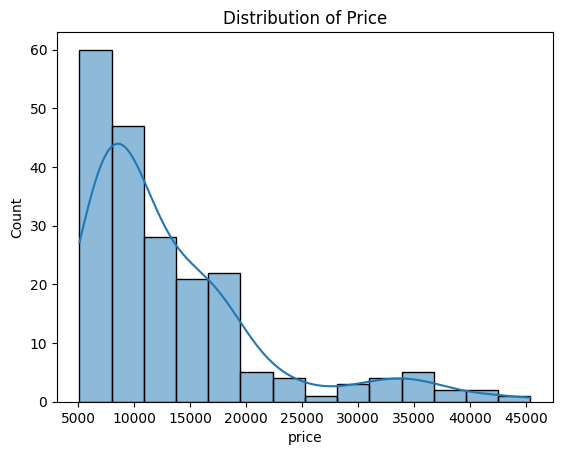

In [17]:
## ploting the distribution of numeric column

sns.histplot(num_df['price'], kde=True)
plt.title('Distribution of Price')
plt.show();

In [24]:
np.log1p(0) == np.log(0+1)

True

In [18]:
# normalize the price column
num_df['price'] = np.log1p(num_df['price'])

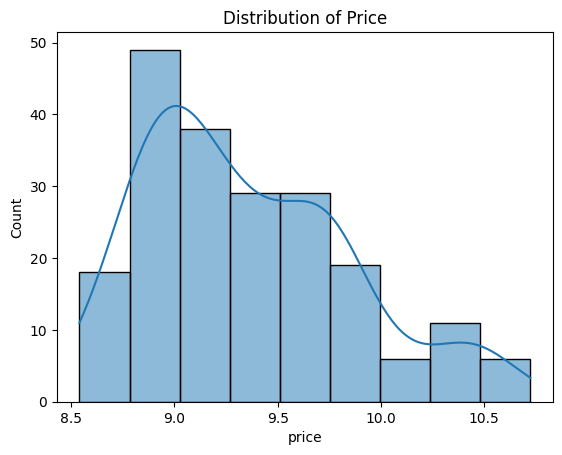

In [19]:
## ploting the distribution of numeric column

sns.histplot(num_df['price'], kde=True)
plt.title('Distribution of Price')
plt.show();

In [30]:
# create our feature and target variables
X = num_df.drop(['price','car_ID'], axis=1)
y = num_df['price']

In [41]:
# import linear regression. ridge and lasso
from sklearn.linear_model import LinearRegression, Ridge, Lasso

# instantiate the models
lr = LinearRegression()
ridge = Ridge(alpha=0.1) # range from 0 to 1 (0.5 is the default value
lasso = Lasso(alpha=0.2) # range from 0 to 1 (0.5 is the default value

# fit the models 
lr.fit(X, y)
ridge.fit(X, y)
lasso.fit(X, y)

# print the model scores
print('Linear Regression:', lr.score(X, y))
print('Ridge:', ridge.score(X, y))
print('Lasso:', lasso.score(X, y))

Linear Regression: 0.8801176137605873
Ridge: 0.8801174337440023
Lasso: 0.8536093873926736


In [36]:
y_pred = lr.predict(X)

In [37]:
# convert the predicted values to the original scale
y_pred_not_log = np.expm1(y_pred)
y_pred_not_log

array([11948.60733094, 11948.60733094, 15840.88455109, 11144.24805215,
       14364.48622471, 13273.99716319, 16668.69320724, 17171.91680686,
       18887.89046681, 17746.27758842, 11991.84211491, 11604.65751961,
       13592.34087368, 13795.99278271, 15951.22292209, 25528.00503631,
       26841.64526006, 30923.99759503,  3889.87906411,  6168.98400014,
        6138.34834465,  6031.14909819,  6876.09759904,  8562.31021323,
        7039.1196767 ,  7081.12085565,  7081.12085565,  8699.18935904,
       10371.63894387, 14080.69359388,  4314.58153092,  6913.57673169,
        5824.97669684,  7197.42072474,  7228.62854229,  7484.05221967,
        7634.28764719,  9000.81279804,  9130.73630268,  9260.58188939,
        8982.02869497, 10246.15647777,  9752.97334425,  8097.88582396,
        6168.98400014,  6126.27873706, 10838.92387661, 33244.92111828,
       33244.92111828, 62460.88504713,  6241.56975233,  6784.92732898,
        6794.10725687,  6903.97996593,  6907.6864736 , 11138.92010587,
      

In [32]:
lasso.coef_

array([ 0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00,  7.49319103e-04,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00,  2.32116811e-03,  9.47169565e-05,
       -0.00000000e+00, -0.00000000e+00])

In [33]:
ridge.coef_

array([ 1.63039485e-02,  5.69251602e-03,  6.99250499e-04,  1.80415355e-02,
        6.02770793e-03,  2.70134524e-04,  2.62614873e-03, -1.26002487e-02,
       -1.09879005e-01,  2.18342632e-02,  3.15954052e-03,  9.28268829e-05,
       -2.94645160e-02,  1.55293262e-02])

In [35]:
# show feature importance in a dataframe sorted by the absolute value
pd.DataFrame({'feature': X.columns, 'coef': lasso.coef_}).sort_values(by='coef', key=lambda x: abs(x), ascending=False)

,feature,coef
10,horsepower,0.002321
5,curbweight,0.000749
11,peakrpm,0.000095
0,symboling,0.000000
1,wheelbase,-0.000000
2,carlength,0.000000
3,carwidth,0.000000
4,carheight,-0.000000
6,enginesize,0.000000
7,boreratio,0.000000


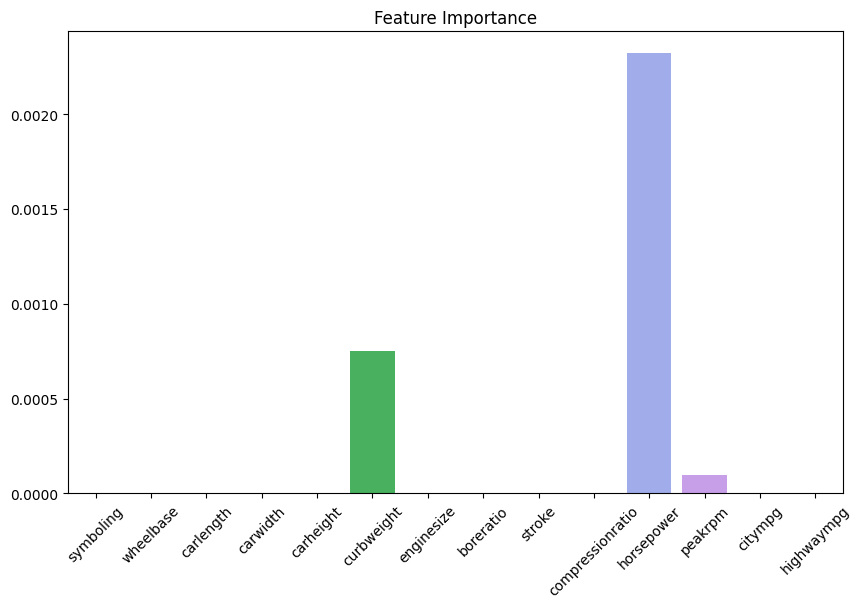

In [34]:
# visualize feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x=X.columns, y=lasso.coef_)
plt.title('Feature Importance')
plt.xticks(rotation=45)
plt.show();